## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import nltk
import re
from collections import Counter

## 4. Vectorization

### 4.0 Import Data

In [2]:
enron_emails = pd.read_csv('../data/enron_emails_processed1.csv')

In [3]:
trec_emails = pd.read_csv("../data/trec_emails_processed.csv")

### 4.1 Combine both datasets

In [4]:
enron_vec = enron_emails[['clean_msg_no_lst', 'target']].copy()
print(enron_vec.shape)

(33345, 2)


In [5]:
trec_vec = trec_emails[['clean_msg_no_lst', 'target']].copy()
print(trec_vec.shape)

(60519, 2)


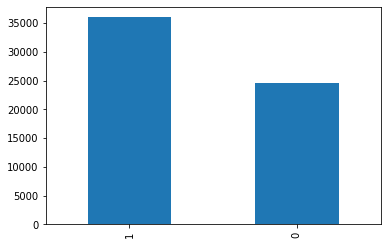

In [6]:
trec_vec['target'].value_counts().plot(kind = 'bar');

In [7]:
# https://python-forum.io/thread-12412.html
# https://www.dataindependent.com/pandas/pandas-sample/
trec_vec = trec_vec.drop(trec_vec.query('target == 1').sample(random_state = 99, frac = .20).index)

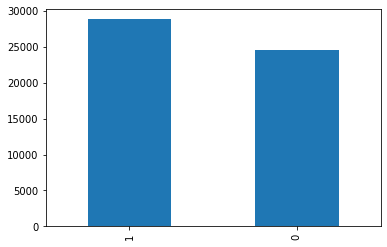

In [8]:
trec_vec['target'].value_counts().plot(kind = 'bar');

In [9]:
# https://riptutorial.com/pandas/example/9811/merging---concatenating---joining-multiple-data-frames--horizontally-and-vertically-
data = pd.concat([enron_vec, trec_vec], ignore_index = True)

### 4.2 Create a Bigram Count Vectors for the Entire Corpus (only run 4.2.1 or 4.2.2 or 4.2.3)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

#### 4.2.1 Using Soley the CountVectorizer to Count Term Frequency

In [11]:
'''
# Instantiate CountVectorizer
# Set parameters: bigram only; remove words appear 10 times or less
bigram_vectorizer = CountVectorizer(ngram_range = (2, 2), min_df = 10)

# Generates word counts in documents
corpus_count_vector = bigram_vectorizer.fit(data['clean_msg_no_lst'])

total_features = len(bigram_vectorizer.vocabulary_)
print(total_features)
'''

"\n# Instantiate CountVectorizer\n# Set parameters: bigram only; remove words appear 10 times or less\nbigram_vectorizer = CountVectorizer(ngram_range = (2, 2), min_df = 10)\n\n# Generates word counts in documents\ncorpus_count_vector = bigram_vectorizer.fit(data['clean_msg_no_lst'])\n\ntotal_features = len(bigram_vectorizer.vocabulary_)\nprint(total_features)\n"

#### 4.2.2 First: Use CountVectorizer to Count Term Frequency

In [12]:
'''
bigram_vectorizer = CountVectorizer(ngram_range = (2, 2), min_df = 10)
corpus_count_vec = bigram_vectorizer.fit_transform(data['clean_msg_no_lst'])
total_features = len(bigram_vectorizer.vocabulary_)
print(total_features)
print(corpus_count_vec.shape)
'''

"\nbigram_vectorizer = CountVectorizer(ngram_range = (2, 2), min_df = 10)\ncorpus_count_vec = bigram_vectorizer.fit_transform(data['clean_msg_no_lst'])\ntotal_features = len(bigram_vectorizer.vocabulary_)\nprint(total_features)\nprint(corpus_count_vec.shape)\n"

#### 4.2.2 Second: Compute IDF values by calling TfidfTransformer on the word counts computed earlier

In [13]:
'''
tfidf_transformer = TfidfTransformer(smooth_idf = True, use_idf = True) 
tfidf_transformer.fit(corpus_count_vec)
'''

'\ntfidf_transformer = TfidfTransformer(smooth_idf = True, use_idf = True) \ntfidf_transformer.fit(corpus_count_vec)\n'

#### 4.2.3 Use Tfidfvectorizer to Compute word counts, idf and tf-idf values

In [14]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (2, 2), min_df = 10, use_idf = True)
# https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
tfidf_vectorizer.fit(data['clean_msg_no_lst'].astype('U'))

TfidfVectorizer(min_df=10, ngram_range=(2, 2))

### 4.3 Train-Test-Split: Enron Data as Train Set & Subset of TREC2007 as Test Set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
a, X_test, b, Y_test = train_test_split(trec_vec[['clean_msg_no_lst']], trec_vec.target, random_state = 99, test_size = 0.15)

print(f"a shape: {a.shape}")
print(f"b shape: {b.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

a shape: (45321, 1)
b shape: (45321,)
X_test shape: (7998, 1)
Y_test shape: (7998,)


### 4.4 Apply Bigrams Vectorization to Transform Train & Test Sets (only run 4.4.1 or 4.4.2 or 4.4.3)

#### 4.4.1: Use the Corpus Count Vector from 4.2.1 to Transform Train & Test Sets

In [17]:
'''
X_train_fitted = corpus_count_vector.transform(enron_vec['clean_msg_no_lst'])
X_test_fitted = corpus_count_vector.transform(X_test['clean_msg_no_lst'])
Y_train = enron_vec.target

print(X_train_fitted.shape)
print(Y_train.shape)
print(X_test_fitted.shape)
'''

"\nX_train_fitted = corpus_count_vector.transform(enron_vec['clean_msg_no_lst'])\nX_test_fitted = corpus_count_vector.transform(X_test['clean_msg_no_lst'])\nY_train = enron_vec.target\n\nprint(X_train_fitted.shape)\nprint(Y_train.shape)\nprint(X_test_fitted.shape)\n"

#### 4.4.2: Use the Corpus Count Vector from 4.2.2 to Transform Train & Test Sets

In [18]:
'''
X_train_vector = bigram_vectorizer.transform(enron_vec['clean_msg_no_lst'])
X_train_fitted = tfidf_transformer.transform(X_train_vector)

X_test_vector = bigram_vectorizer.transform(X_test['clean_msg_no_lst'])
X_test_fitted = tfidf_transformer.transform(X_test_vector)

Y_train = enron_vec.target

print(X_train_fitted.shape)
print(Y_train.shape)
print(X_test_fitted.shape)
'''

"\nX_train_vector = bigram_vectorizer.transform(enron_vec['clean_msg_no_lst'])\nX_train_fitted = tfidf_transformer.transform(X_train_vector)\n\nX_test_vector = bigram_vectorizer.transform(X_test['clean_msg_no_lst'])\nX_test_fitted = tfidf_transformer.transform(X_test_vector)\n\nY_train = enron_vec.target\n\nprint(X_train_fitted.shape)\nprint(Y_train.shape)\nprint(X_test_fitted.shape)\n"

#### 4.4.3: Use the Corpus Count Vector from 4.2.3 to Transform Train & Test Sets

In [19]:
X_train_fitted = tfidf_vectorizer.transform(enron_vec['clean_msg_no_lst'].astype('U'))
X_test_fitted = tfidf_vectorizer.transform(X_test['clean_msg_no_lst'].astype('U'))
Y_train = enron_vec.target

print(X_train_fitted.shape)
print(Y_train.shape)
print(X_test_fitted.shape)

(33345, 100473)
(33345,)
(7998, 100473)


## 5. Classification Modeling

In [20]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 5.1 Random Forest Model

In [21]:
# Manual grid search for random forest 
'''
def explore_rf_params(n_est, depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1, random_state = 42)
    rf_model = rf.fit(X_train_fitted, Y_train)
    Y_pred = rf_model.predict(X_test_fitted)
    precision, recall, fscore, support = score(Y_test, Y_pred, pos_label = 1, average = 'binary')
    print(f"Est: {n_est} / Depth: {depth} ---- Precision: {round(precision, 3)} / Recall: {round(recall, 3)} / f1-score: {round(fscore, 3)} / Accuracy: {round((Y_pred==Y_test).sum() / len(Y_pred), 3)}")
    
for n_est in [50, 100, 150]:
    for depth in [10, 20, 30, None]:
        explore_rf_params(n_est, depth)
'''

'\ndef explore_rf_params(n_est, depth):\n    rf = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1, random_state = 42)\n    rf_model = rf.fit(X_train_fitted, Y_train)\n    Y_pred = rf_model.predict(X_test_fitted)\n    precision, recall, fscore, support = score(Y_test, Y_pred, pos_label = 1, average = \'binary\')\n    print(f"Est: {n_est} / Depth: {depth} ---- Precision: {round(precision, 3)} / Recall: {round(recall, 3)} / f1-score: {round(fscore, 3)} / Accuracy: {round((Y_pred==Y_test).sum() / len(Y_pred), 3)}")\n    \nfor n_est in [50, 100, 150]:\n    for depth in [10, 20, 30, None]:\n        explore_rf_params(n_est, depth)\n'

In [22]:
rf = RandomForestClassifier(n_estimators = 50, max_depth = None, random_state = 42, n_jobs = -1).fit(X_train_fitted, Y_train)

### 5.1.1 Store RF via pickle

In [23]:
# create an iterator object with write permission - model.pkl
with open('../models1/rf_pkl', 'wb') as files:
    pickle.dump(rf, files)

In [24]:
# load saved model
with open('../models1/rf_pkl' , 'rb') as f:
    rf = pickle.load(f)

### 5.1.2 Use RF for Ham/Spam Predictions

In [25]:
rf_predictions = rf.predict(X_test_fitted)
print(classification_report(Y_test, rf_predictions))
print(confusion_matrix(Y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.79      0.12      0.21      3695
           1       0.56      0.97      0.71      4303

    accuracy                           0.58      7998
   macro avg       0.68      0.55      0.46      7998
weighted avg       0.67      0.58      0.48      7998

[[ 450 3245]
 [ 117 4186]]


### 5.1.3 RF Confusion Matrix

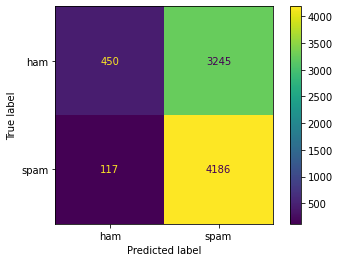

In [26]:
cm_rf = confusion_matrix(Y_test, rf_predictions)
cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['ham','spam'])
cmd_rf.plot();

### 5.1.4 RF ROC Curve

Random Forest: ROC AUC=0.711


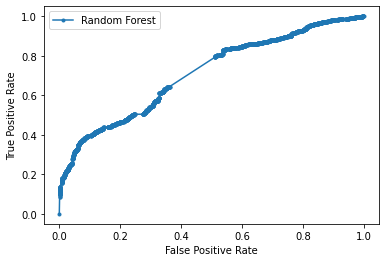

In [27]:
# predict probabilities
rf_probs = rf.predict_proba(X_test_fitted)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate roc scores
rf_auc = roc_auc_score(Y_test, rf_probs)

# summarize scores
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.', label = 'Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### 5.2 Naive Bayes

In [28]:
mbayes = MultinomialNB().fit(X_train_fitted, Y_train)

### 5.2.1 Store Naive Bayes via pickle

In [29]:
with open('../models1/mbayes_pkl', 'wb') as files:
    pickle.dump(mbayes, files)

In [30]:
with open('../models1/mbayes_pkl' , 'rb') as f:
    mbayes = pickle.load(f)

### 5.2.2 Use Naive Bayes for Ham/Spam Predictions

In [31]:
mbayes_predictions = mbayes.predict(X_test_fitted)
print(classification_report(Y_test, mbayes_predictions))
print(confusion_matrix(Y_test, mbayes_predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      3695
           1       0.82      0.75      0.79      4303

    accuracy                           0.78      7998
   macro avg       0.78      0.78      0.78      7998
weighted avg       0.78      0.78      0.78      7998

[[2987  708]
 [1064 3239]]


### 5.2.3 Naive Bayes Confusion Matrix

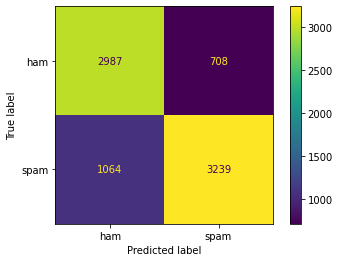

In [32]:
cm_mbayes = confusion_matrix(Y_test, mbayes_predictions)
cmd_mbayes = ConfusionMatrixDisplay(cm_mbayes, display_labels=['ham','spam'])
cmd_mbayes.plot();

### 5.2.4 Naive Bayes ROC Curve

Naive Bayes: ROC AUC=0.851


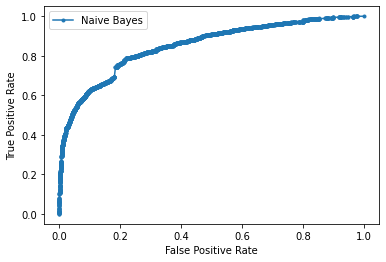

In [33]:
# predict probabilities
mbayes_probs = mbayes.predict_proba(X_test_fitted)

# keep probabilities for the positive outcome only
mbayes_probs = mbayes_probs[:, 1]
# calculate roc scores
mbayes_auc = roc_auc_score(Y_test, mbayes_probs)

# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (mbayes_auc))

# calculate roc curves
mbayes_fpr, mbayes_tpr, _ = roc_curve(Y_test, mbayes_probs)

# plot the roc curve for the model
plt.plot(mbayes_fpr, mbayes_tpr, marker='.', label = 'Naive Bayes')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### 5.3 Logistic Regression

In [34]:
lr = LogisticRegression().fit(X_train_fitted, Y_train)

### 5.3.1 Store Logistic Regression via pickle

In [35]:
with open('../models1/lr_pkl', 'wb') as files:
    pickle.dump(lr, files)

In [36]:
with open('../models1/lr_pkl' , 'rb') as f:
    lr = pickle.load(f)

### 5.3.2 Use Logistic Regression for Ham/Spam Predictions

In [37]:
lr_predictions = lr.predict(X_test_fitted)
print(classification_report(Y_test, lr_predictions))
print(confusion_matrix(Y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.85      0.09      0.16      3695
           1       0.56      0.99      0.71      4303

    accuracy                           0.57      7998
   macro avg       0.70      0.54      0.44      7998
weighted avg       0.69      0.57      0.46      7998

[[ 334 3361]
 [  60 4243]]


### 5.3.3 Logistic Regression Confusion Matrix

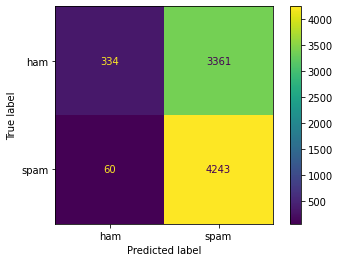

In [38]:
cm_lr = confusion_matrix(Y_test, lr_predictions)
cmd_lr = ConfusionMatrixDisplay(cm_lr, display_labels=['ham','spam'])
cmd_lr.plot();

### 5.3.4 Logistic Regression ROC Curve

Logistic Regression: ROC AUC=0.793


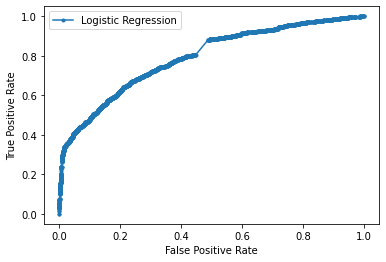

In [39]:
# predict probabilities
lr_probs = lr.predict_proba(X_test_fitted)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc scores
lr_auc = roc_auc_score(Y_test, lr_probs)

# summarize scores
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### 5.4 SVM

In [40]:
svm_SVC = svm.SVC(kernel = 'rbf', gamma = 0.01, probability = True).fit(X_train_fitted, Y_train)

### 5.4.1 Store SVM via pickle

In [41]:
with open('../models1/svm_pkl', 'wb') as files:
    pickle.dump(svm_SVC, files)

In [42]:
with open('../models1/svm_pkl' , 'rb') as f:
    svm_SVC = pickle.load(f)

### 5.4.2 Use SVM for Ham/Spam Predictions

In [43]:
svm_SVC_predictions = svm_SVC.predict(X_test_fitted)
print(classification_report(Y_test, svm_SVC_predictions))
print(confusion_matrix(Y_test, svm_SVC_predictions))

              precision    recall  f1-score   support

           0       0.95      0.01      0.02      3695
           1       0.54      1.00      0.70      4303

    accuracy                           0.54      7998
   macro avg       0.74      0.50      0.36      7998
weighted avg       0.73      0.54      0.39      7998

[[  36 3659]
 [   2 4301]]


### 5.4.3 SVM Confusion Matrix

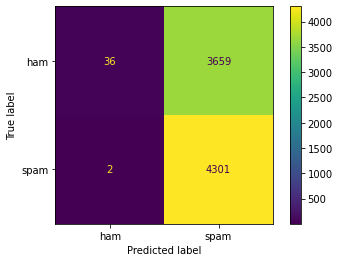

In [44]:
cm_svm = confusion_matrix(Y_test, svm_SVC_predictions)
cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['ham','spam'])
cmd_svm.plot();

### 5.4.4 SVM ROC Curve

SVM: ROC AUC=0.790


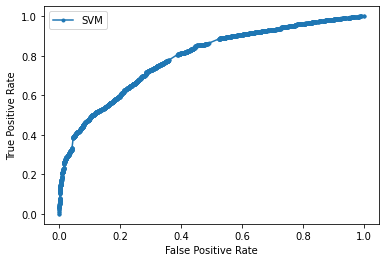

In [45]:
# predict probabilities
# https://www.discoverbits.in/371/sklearn-attributeerror-predict_proba-available-probability
svm_probs = svm_SVC.predict_proba(X_test_fitted)

# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# calculate roc scores
svm_auc = roc_auc_score(Y_test, svm_probs)

# summarize scores
print('SVM: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_probs)

# plot the roc curve for the model
plt.plot(svm_fpr, svm_tpr, marker='.', label = 'SVM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### 5.5 KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_fitted, Y_train)

### 5.5.1 Store KNN via pickle

In [47]:
with open('../models1/knn_pkl', 'wb') as files:
    pickle.dump(knn, files)

In [48]:
with open('../models1/knn_pkl' , 'rb') as f:
    knn = pickle.load(f)

### 5.5.2 Use KNN for Ham/Spam Predictions

In [49]:
knn_predictions = knn.predict(X_test_fitted)
print(confusion_matrix(Y_test, knn_predictions))
print(classification_report(Y_test, knn_predictions))

[[ 360 3335]
 [ 439 3864]]
              precision    recall  f1-score   support

           0       0.45      0.10      0.16      3695
           1       0.54      0.90      0.67      4303

    accuracy                           0.53      7998
   macro avg       0.49      0.50      0.42      7998
weighted avg       0.50      0.53      0.44      7998



### 5.5.3 KNN Confusion Matrix

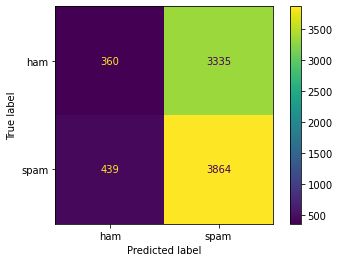

In [50]:
cm_knn = confusion_matrix(Y_test, knn_predictions)
cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=['ham','spam'])
cmd_knn.plot();

### 5.5.4 KNN ROC Curve¶

KNN: ROC AUC=0.483


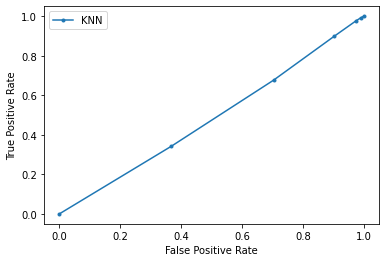

In [51]:
# https://www.discoverbits.in/371/sklearn-attributeerror-predict_proba-available-probability
knn_probs = knn.predict_proba(X_test_fitted)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# calculate roc scores
knn_auc = roc_auc_score(Y_test, knn_probs)

# summarize scores
print('KNN: ROC AUC=%.3f' % (knn_auc))

# calculate roc curves
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

# plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, marker='.', label = 'KNN')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()